In [2]:
import numpy as np
from matplotlib import pyplot as plt
from al import ann_to_labels
from multiprocessing import Pool
import cv2

cpu


# Convert forest model png labels to npy

In [3]:
r3_forest = cv2.imread("../../outputs/saugat-forestMap-R3/Forest_Map_saugat.png")

In [4]:
r3_forest = np.sum(r3_forest, axis=-1)
r3_forest = np.where(r3_forest > 0, 1, 0)

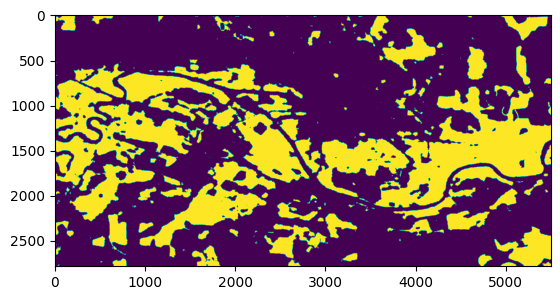

In [5]:
plt.imshow(r3_forest)

In [34]:
np.save("./data_al/forest/R3_forest_labels.npy", r3_forest)

In [7]:
r3_forest.shape

(2782, 5500)

In [ ]:
r3_fea = np.load("./data_al/repo/Features_7_Channels/")

In [16]:
new_labels = ann_to_labels(f"./users/saugat/output/lambda_search/L1.0.1_P.1_E.0_C.0_TA.avg_SA.avg/R0_labels_0.png", 0)
dem = np.load(f"./data_al/repo/Features_7_Channels/Region_{0}_Features7Channel.npy")[:,:,3]
dem_00 = dem[500:1500,1000:]

In [17]:
new_labels_00 = new_labels[500:1500,1000:]
selected_pixels_00 = np.where(new_labels_00 != 0)

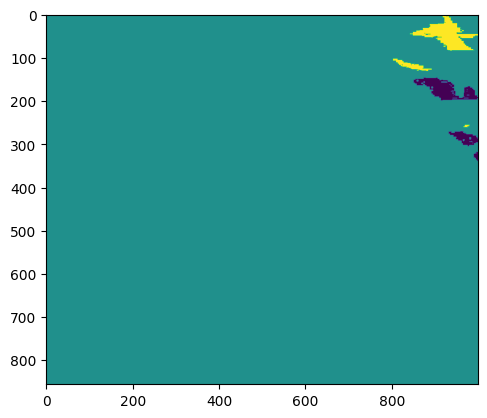

In [18]:
plt.imshow(new_labels_00)

In [37]:
bfs_queue = []
height, width = gt_0.shape
bfs_visited = np.zeros((height, width)).astype('int')

for j in selected_pixels[0]:
    for i in selected_pixels[1]:

        # this pixel might be selected twice
        if bfs_visited[j][i]:
            continue

        bfs_queue.append((j,i))
        bfs_visited[j][i] = 1

        while bfs_queue:
            (j, i) = bfs_queue.pop(0)
    #             print(j, i)
            bfs_visited[j][i] = 1

            # go through the 8 neighbors
            for l in [-1, 0, 1]:
                for r in [-1, 0, 1]:
                    if (l == r == 0):
                        continue

                    j_nei, i_nei = (j+l, i+r) # get the neighboring i and j

                    # check for boundary cases
                    if i_nei < 0 or j_nei < 0 or i_nei >= width or j_nei >= height:
                        continue

                    # check if already visited or not
                    if bfs_visited[j_nei][i_nei]:
                        continue

                    # check current pixel's elevation with neighbor's elevation
                    if (new_labels[j][i] == 1 and (dem[j_nei][i_nei] <= dem[j][i]) and (new_labels[j_nei][i_nei] != 1)):
                        new_labels[j_nei][i_nei] = 1
                        bfs_queue.append((j_nei, i_nei))
                    elif (new_labels[j][i] == -1 and (dem[j_nei][i_nei] >= dem[j][i]) and (new_labels[j_nei][i_nei] != -1)):
                        new_labels[j_nei][i_nei] = -1
                        bfs_queue.append((j_nei, i_nei))

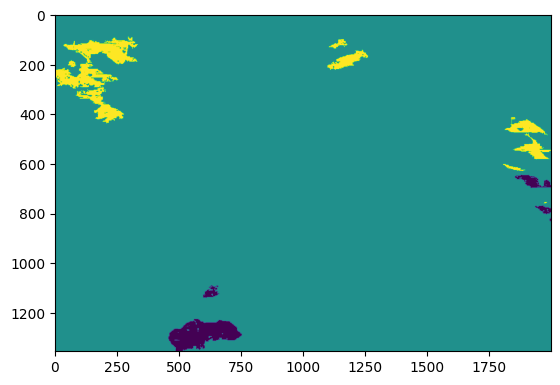

In [38]:
plt.imshow(new_labels)

In [27]:
bfs_queue = []
height, width = gt_00.shape
bfs_visited = np.zeros((height, width)).astype('int')

for j in selected_pixels_00[0]:
    for i in selected_pixels_00[1]:

        # this pixel might be selected twice
        if bfs_visited[j][i]:
            continue

        bfs_queue.append((j,i))
        bfs_visited[j][i] = 1

        while bfs_queue:
            (j, i) = bfs_queue.pop(0)
    #             print(j, i)
            bfs_visited[j][i] = 1

            # go through the 8 neighbors
            for l in [-1, 0, 1]:
                for r in [-1, 0, 1]:
                    if (l == r == 0):
                        continue

                    j_nei, i_nei = (j+l, i+r) # get the neighboring i and j

                    # check for boundary cases
                    if i_nei < 0 or j_nei < 0 or i_nei >= width or j_nei >= height:
                        continue

                    # check if already visited or not
                    if bfs_visited[j_nei][i_nei]:
                        continue

                    # check current pixel's elevation with neighbor's elevation
                    if (new_labels_00[j][i] == 1 and (dem_00[j_nei][i_nei] <= dem_00[j][i]) and (new_labels_00[j_nei][i_nei] != 1)):
                        new_labels_00[j_nei][i_nei] = 1
                        bfs_queue.append((j_nei, i_nei))
                    if (new_labels_00[j][i] == -1 and (dem_00[j_nei][i_nei] >= dem_00[j][i]) and (new_labels_00[j_nei][i_nei] != -1)):
                        new_labels_00[j_nei][i_nei] = -1
                        bfs_queue.append((j_nei, i_nei))

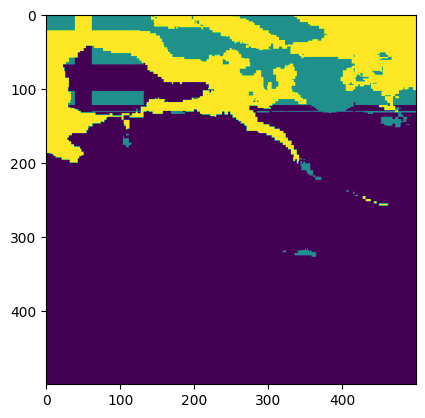

In [28]:
plt.imshow(new_labels_00)

In [29]:
len(selected_pixels_00[0])

7588

In [30]:
len(selected_pixels[0])

115894

In [31]:
115894/7588

15.273326304691619

In [32]:
15*9

135

In [39]:
import torch
import numpy as np

In [54]:
x = torch.tensor(np.array(
    [
        [
            [
                [
                    1,2
                ],
                [
                    3,4
                ]
            ],
            [
                [
                    5,6
                ],
                [
                    7,8
                ]
            ]
        ],
        [
            [
                [
                    9,10
                ],
                [
                    11,12
                ]
            ],
            [
                [
                    13,14
                ],
                [
                    15,16
                ]
            ]
        ],
        [
            [
                [
                    17,18
                ],
                [
                    19,20
                ]
            ],
            [
                [
                    21,22
                ],
                [
                    23,24
                ]
            ]
        ],
        [
            [
                [
                    25,26
                ],
                [
                    27,28
                ]
            ],
            [
                [
                    29,30
                ],
                [
                    31,32
                ]
            ]
        ],
    ]
))

In [55]:
x.shape

torch.Size([4, 2, 2, 2])

In [56]:
x

tensor([[[[ 1,  2],
          [ 3,  4]],

         [[ 5,  6],
          [ 7,  8]]],


        [[[ 9, 10],
          [11, 12]],

         [[13, 14],
          [15, 16]]],


        [[[17, 18],
          [19, 20]],

         [[21, 22],
          [23, 24]]],


        [[[25, 26],
          [27, 28]],

         [[29, 30],
          [31, 32]]]])

In [57]:
xx = x.view(x.size(0), -1)

In [58]:
xx.shape

torch.Size([4, 8])

In [59]:
xx

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16],
        [17, 18, 19, 20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29, 30, 31, 32]])